# Explore BL19 data Pipeline

Here we introduce some useful DataJoint tools to explore the bl19 pipeline

First thing first, import datajoint

In [1]:
from scripts.conf_file_finding import try_find_conf_file
try_find_conf_file()
import datajoint as dj

Local configuration file found !!, no need to run the configuration (unless configuration has changed)


# 1. Browse schemas you have access to - `dj.list_schemas()`

In [2]:
dj.list_schemas()

Connecting alvaros@datajoint01.pni.princeton.edu:3306


['alvaros_acquisition',
 'alvaros_action',
 'alvaros_bdata',
 'alvaros_eibs',
 'alvaros_electrophysiology',
 'alvaros_lab',
 'alvaros_pbups_behavior',
 'alvaros_protocol',
 'alvaros_ratinfo',
 'alvaros_subject',
 'bdatatest',
 'bl_acquisition',
 'bl_action',
 'bl_bdata',
 'bl_lab',
 'bl_legacy_ephys',
 'bl_new_acquisition',
 'bl_new_action',
 'bl_new_ephys_element',
 'bl_new_lab',
 'bl_new_probe_element',
 'bl_new_subject',
 'bl_newlab',
 'bl_protocol',
 'bl_ratinfo',
 'bl_shadow_acquisition',
 'bl_shadow_action',
 'bl_shadow_lab',
 'bl_shadow_subject',
 'bl_subject',
 'mysql',
 'ratinfotest']


## Major schemas:   

Meta data: `bl_lab`, `bl_subject`, `bl_action`, 
These schemas have been generated by matlab or python, but as a user, you don't have to get the code to generate these tables. To work with these tables, the simplest thing you would do is to reconstruct a module that represents this schema with the method `create_virtual_module`.

In [3]:
from bl_pipeline import lab

In [4]:
lab.Contacts()

user_id PNI netID or similar,contacts_old_id,experimenter first name (must be unique so may need to add last initial),email princeton email address,initials 2 letter initials,telephone cell phone digits only,tag_letter first letter of rat's name,lab_manager 1 if you're lab manager,subscribe_all 1 is you want to get all automated emails,tech_morning 1 if you're a B shift tech,tech_afternoon 1 if you're a C shift tech,tech_computer 1 if you're the computer tech,is_alumni 1 if you're an alumni of the lab,full_name You're full name however you like it,tech_overnight 1 if you're the A shift tech,tag_rgb 3 integers 0 to 255 determines the color of your cage cards,"tech_shifts shifts a tech is scheduled to work, rigs an experimenter is responsible for fixing","phone_carrier cell phone network provider, necessary to send text messages"
aacarter,44,Audrey,aacarter@exchange.Princeton.EDU,AC,7323127940,,0,0,0,1,0,1,Audrey Carter,0,None,,None
aarusso,106,Abby,aarusso@princeton.edu,AR,2019533121,,0,0,0,0,0,0,Abby Russo,0,,,verizon
abaum,73,Amy,abaum@princeton.edu,AB,6097271712,,0,0,0,0,0,1,Amy Baum,1,,,tmobile
abondy,86,Adrian,abondy@princeton.edu,AG,2024604821,A,0,0,0,0,0,0,Adrian Gopnik Bondy,0,120 255 230,"22,25,28,301,310,319,328,333",verizon
adrianna,46,Adrianna,adrianna@princeton.edu,,0,,0,0,0,0,0,1,Adrianna Loback,0,None,,None
af10,66,Annabelle,af10@princeton.edu,AF,7879252032,,0,0,0,0,0,1,Annabelle Flores,0,,,att
afbustos,101,Andres,afbustos@princeton.edu,AB,9089063728,,0,0,0,1,0,0,Andres Bustos,0,,"Ra,Fa,Sc,Uc",tmobile
ahady,60,Ahmed,ahady@princeton.edu,AH,6093566277,H,0,0,0,0,0,0,Ahmed El Hady,0,0 255 0,"12,14,15,24,27,302,311,320,329",tmobile
alvaros,115,Alvaro,alvaros@princeton.edu,AL,6099333859,,0,0,0,0,0,0,Alvaro Luna,0,,,tmobile
amirr,21,Amir,amirr@princeton.edu,AR,0,,0,0,0,0,0,1,None,0,None,,None


In [4]:
lab = dj.create_virtual_module('lab', 'bl_new_lab') # the first argument here is the __name__ of the virtual module
subject = dj.create_virtual_module('subject', 'bl_new_subject')
action = dj.create_virtual_module('action', 'bl_new_action')
acquisition = dj.create_virtual_module('acquisition', 'bl_new_acquisition')

# 2. Browse tables in a schema - `dj.Diagram`

**Table tiers**:  
Manual table: green box  
Lookup table: gray box  
Imported table: blue oval  
Computed table: red circle  
Part table: plain text

**Dependencies**:  
One-to-one primary: thick solid line  
One-to-many primary: thin solid line  
Secondary foreign key reference: dashed line
renamed secondary foreign key references: orange dot

## Show tables in the whole schema

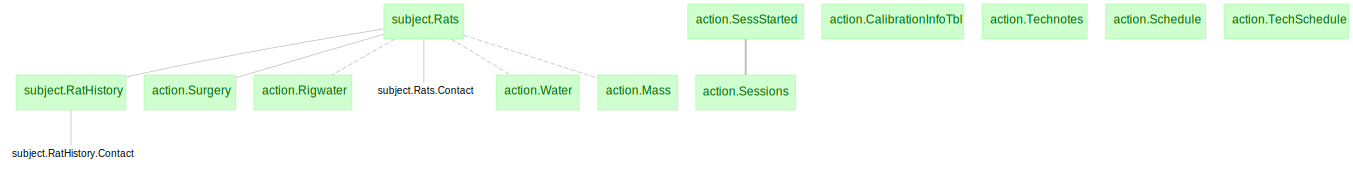

In [5]:
dj.Diagram(subject) + dj.Diagram(action) 

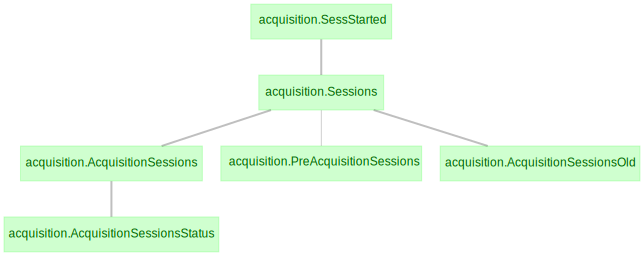

In [6]:
dj.Diagram(acquisition)

# 3. Getting the detailed definition of a table - `table.describe()`

In [8]:
subject.Rats.describe();

ratname              : varchar(8)                   # Unique rat name, 1 letter 3 numbers
---
-> lab.Contacts
rats_old_id=null     : int                          # was a unique number assigned to each rat
free=0               : tinyint                      # whether or not the rat is available for use by any other experimenter
comments=null        : varchar(500)                 # any notes about the animal, surgery info, transgenic strain...
vendor="Taconic"     : varchar(40)                  # e.g. Taconic, Charles River, etc.
waterperday=30.0     : decimal(3,1)                 # WHERE IT IS THE PERCENT BODY MASS THE RAT WILL BE OFFERED IN THE PUB, VALUES < 3.0 ARE NOT ALLOWED BY PROTOCOL, 100 INTERPRETED AS TO BE EXCLUDED FROM THE PUB AND RECEIVE WATER IN HOME CAGE
recovering=0         : tinyint                      # whether or not the rat is currently in recovery from surgery or illness
deliverydate=null    : date                         # date rat arrived at lab
extant=0          

# 4. Browsing of data - queries

Query all subjects

In [9]:
subject.Rats()

"ratname Unique rat name, 1 letter 3 numbers",user_id PNI netID or similar,rats_old_id was a unique number assigned to each rat,free whether or not the rat is available for use by any other experimenter,"comments any notes about the animal, surgery info, transgenic strain...","vendor e.g. Taconic, Charles River, etc.","waterperday WHERE IT IS THE PERCENT BODY MASS THE RAT WILL BE OFFERED IN THE PUB, VALUES < 3.0 ARE NOT ALLOWED BY PROTOCOL, 100 INTERPRETED AS TO BE EXCLUDED FROM THE PUB AND RECEIVE WATER IN HOME CAGE",recovering whether or not the rat is currently in recovery from surgery or illness,deliverydate date rat arrived at lab,extant 1 if the rat is still alive,cagemate the name of the rat this rat lives with SHOULD BE ENLARGED TO ALLOW FOR MICE THAT HAVE MORE THAN 1 CAGEMATE,force_free_water not used,date_sac date the rat was euthanized or died,"force_dep_water training session during which a rat should receive water, for restricting rats not on the training schedule",larid the ID assigned to the rat by LAR (I don't think we use this),"israt 1 if rat, 0 if mouse"
,skarnup,820,0,,Taconic,0.0,0,2011-01-18,0,,0,None,0,None,1
0045,skarnup,450,0,"Not delivered, ordered on 2009-08-17",Taconic,0.0,0,None,0,0046,0,None,0,None,1
0050,skarnup,455,0,Not delivered,Taconic,0.0,0,None,0,0049,0,None,0,None,1
0051,skarnup,456,0,Not delivered,Taconic,0.0,0,None,0,0052,0,None,0,None,1
0052,skarnup,457,0,Not delivered,Taconic,0.0,0,None,0,0051,0,None,0,None,1
0053,skarnup,458,0,Not delivered,Taconic,0.0,0,None,0,0054,0,None,0,None,1
0100,skarnup,639,0,"Sachi&Travis practiced, CTB in left FOF",Taconic,0.0,0,None,0,0099,0,None,0,None,1
0101,skarnup,640,0,BDA injection in right FOF,Taconic,0.0,0,None,0,0102,0,None,0,None,1
0102,skarnup,641,0,PRV in left FOF,Taconic,0.0,0,None,0,0101,0,None,0,None,1
0103,skarnup,642,0,"PRV in left FOF, 184 nl",Taconic,0.0,0,None,0,0104,0,None,0,None,1


## Restriction  `&`: filtering data

### Restriction: Query one subject

In [10]:
# restrict by string
subject.Rats & 'ratname="A230"'

"ratname Unique rat name, 1 letter 3 numbers",user_id PNI netID or similar,rats_old_id was a unique number assigned to each rat,free whether or not the rat is available for use by any other experimenter,"comments any notes about the animal, surgery info, transgenic strain...","vendor e.g. Taconic, Charles River, etc.","waterperday WHERE IT IS THE PERCENT BODY MASS THE RAT WILL BE OFFERED IN THE PUB, VALUES < 3.0 ARE NOT ALLOWED BY PROTOCOL, 100 INTERPRETED AS TO BE EXCLUDED FROM THE PUB AND RECEIVE WATER IN HOME CAGE",recovering whether or not the rat is currently in recovery from surgery or illness,deliverydate date rat arrived at lab,extant 1 if the rat is still alive,cagemate the name of the rat this rat lives with SHOULD BE ENLARGED TO ALLOW FOR MICE THAT HAVE MORE THAN 1 CAGEMATE,force_free_water not used,date_sac date the rat was euthanized or died,"force_dep_water training session during which a rat should receive water, for restricting rats not on the training schedule",larid the ID assigned to the rat by LAR (I don't think we use this),"israt 1 if rat, 0 if mouse"
A230,abondy,2763,0,,Hilltop,30.0,0,2018-05-08,0,,0,2019-09-06,0,None,1


In [11]:
# restrict by dictionary
subject.Rats & {'ratname': 'A230'}

"ratname Unique rat name, 1 letter 3 numbers",user_id PNI netID or similar,rats_old_id was a unique number assigned to each rat,free whether or not the rat is available for use by any other experimenter,"comments any notes about the animal, surgery info, transgenic strain...","vendor e.g. Taconic, Charles River, etc.","waterperday WHERE IT IS THE PERCENT BODY MASS THE RAT WILL BE OFFERED IN THE PUB, VALUES < 3.0 ARE NOT ALLOWED BY PROTOCOL, 100 INTERPRETED AS TO BE EXCLUDED FROM THE PUB AND RECEIVE WATER IN HOME CAGE",recovering whether or not the rat is currently in recovery from surgery or illness,deliverydate date rat arrived at lab,extant 1 if the rat is still alive,cagemate the name of the rat this rat lives with SHOULD BE ENLARGED TO ALLOW FOR MICE THAT HAVE MORE THAN 1 CAGEMATE,force_free_water not used,date_sac date the rat was euthanized or died,"force_dep_water training session during which a rat should receive water, for restricting rats not on the training schedule",larid the ID assigned to the rat by LAR (I don't think we use this),"israt 1 if rat, 0 if mouse"
A230,abondy,2763,0,,Hilltop,30.0,0,2018-05-08,0,,0,2019-09-06,0,None,1


In [12]:
subject.Rats & [{'user_id': 'abondy'}]

"ratname Unique rat name, 1 letter 3 numbers",user_id PNI netID or similar,rats_old_id was a unique number assigned to each rat,free whether or not the rat is available for use by any other experimenter,"comments any notes about the animal, surgery info, transgenic strain...","vendor e.g. Taconic, Charles River, etc.","waterperday WHERE IT IS THE PERCENT BODY MASS THE RAT WILL BE OFFERED IN THE PUB, VALUES < 3.0 ARE NOT ALLOWED BY PROTOCOL, 100 INTERPRETED AS TO BE EXCLUDED FROM THE PUB AND RECEIVE WATER IN HOME CAGE",recovering whether or not the rat is currently in recovery from surgery or illness,deliverydate date rat arrived at lab,extant 1 if the rat is still alive,cagemate the name of the rat this rat lives with SHOULD BE ENLARGED TO ALLOW FOR MICE THAT HAVE MORE THAN 1 CAGEMATE,force_free_water not used,date_sac date the rat was euthanized or died,"force_dep_water training session during which a rat should receive water, for restricting rats not on the training schedule",larid the ID assigned to the rat by LAR (I don't think we use this),"israt 1 if rat, 0 if mouse"
A181,abondy,2393,0,,Hilltop,30.0,0,2017-01-31,0,,0,2018-03-26,0,None,1
A182,abondy,2394,0,LAR extension until 2019-04-01,Hilltop,30.0,0,2017-01-31,0,,0,2019-04-01,0,None,1
A183,abondy,2395,0,LAR extension until 2019-04-01 Water Pub Exclude,Hilltop,30.0,1,2017-01-31,0,,0,2019-03-04,0,None,1
A184,abondy,2396,0,Injected with AAV PHPeB GCAMP6f 2/15/18 - 100 ul,Hilltop,30.0,0,2017-01-31,0,,0,2019-02-08,0,None,1
A185,abondy,2397,0,LAR extension until 2019-04-01,Hilltop,30.0,1,2017-01-31,0,,0,2019-02-08,0,None,1
A186,abondy,2398,1,,Hilltop,30.0,0,2017-01-31,0,,0,2018-06-25,0,None,1
A187,abondy,2568,0,"Drd1a-iCre +/- #48 temporarily moved out of colony for breeding (AGB, 10/26/2018) and returned 2/2019",PNI,30.0,0,2017-08-11,0,,0,2019-08-07,0,None,1
A188,abondy,2569,0,Drd1a-iCre +/- #47,PNI,30.0,0,2017-08-11,0,,0,2019-07-13,0,None,1
A192,abondy,2570,0,Drd1a-iCre +/- #46 LAR EXTENSION UNTIL 191011,PNI,30.0,0,2017-08-11,0,,0,2019-10-03,0,None,1
A193,abondy,2572,0,Drd1a-iCre +/- #52 FEMALE,PNI,30.0,0,2017-08-11,0,A194,0,2017-09-15,0,None,1


### Restriction: Query subjects born after a date

In [13]:
subject.Rats & 'deliverydate > "2020-01-01"'

"ratname Unique rat name, 1 letter 3 numbers",user_id PNI netID or similar,rats_old_id was a unique number assigned to each rat,free whether or not the rat is available for use by any other experimenter,"comments any notes about the animal, surgery info, transgenic strain...","vendor e.g. Taconic, Charles River, etc.","waterperday WHERE IT IS THE PERCENT BODY MASS THE RAT WILL BE OFFERED IN THE PUB, VALUES < 3.0 ARE NOT ALLOWED BY PROTOCOL, 100 INTERPRETED AS TO BE EXCLUDED FROM THE PUB AND RECEIVE WATER IN HOME CAGE",recovering whether or not the rat is currently in recovery from surgery or illness,deliverydate date rat arrived at lab,extant 1 if the rat is still alive,cagemate the name of the rat this rat lives with SHOULD BE ENLARGED TO ALLOW FOR MICE THAT HAVE MORE THAN 1 CAGEMATE,force_free_water not used,date_sac date the rat was euthanized or died,"force_dep_water training session during which a rat should receive water, for restricting rats not on the training schedule",larid the ID assigned to the rat by LAR (I don't think we use this),"israt 1 if rat, 0 if mouse"
A281,abondy,3276,0,Drd2-iCre +/- #104,PNI,30.0,0,2020-02-20,1,A282,0,None,0,None,1
A282,abondy,3277,0,Drd2-iCre +/- #103,PNI,30.0,0,2020-02-20,1,A281,0,None,0,None,1
A283,abondy,3278,0,Drd2-iCre +/- #101,PNI,30.0,0,2020-02-20,0,A284,0,None,0,None,1
A284,abondy,3279,0,Drd2-iCre +/- #105,PNI,30.0,0,2020-02-20,0,A283,0,None,0,None,1
A285,abondy,3280,0,Drd2-iCre +/- #106,PNI,30.0,0,2020-02-20,0,,0,None,0,None,1
A286,abondy,3281,0,Tac1-Cre +/- #418,PNI,30.0,0,2020-02-20,0,A287,0,None,0,None,1
A287,abondy,3282,0,Tac1-Cre +/- #419,PNI,30.0,0,2020-02-20,0,A286,0,None,0,None,1
A288,abondy,3284,0,Tac1-Cre +/- #408,PNI,30.0,0,2020-02-20,0,A289,0,None,0,None,1
A289,abondy,3283,0,Tac1-Cre +/- #421,PNI,30.0,0,2020-02-20,0,A288,0,None,0,None,1
A290,abondy,3285,0,Tac1-Cre +/- #420,PNI,30.0,0,2020-02-20,1,A291,0,None,0,None,1


### Restriction: subjects within a range of dates

In [14]:
subject.Rats & 'deliverydate between "2019-01-01" and "2019-04-01"'

"ratname Unique rat name, 1 letter 3 numbers",user_id PNI netID or similar,rats_old_id was a unique number assigned to each rat,free whether or not the rat is available for use by any other experimenter,"comments any notes about the animal, surgery info, transgenic strain...","vendor e.g. Taconic, Charles River, etc.","waterperday WHERE IT IS THE PERCENT BODY MASS THE RAT WILL BE OFFERED IN THE PUB, VALUES < 3.0 ARE NOT ALLOWED BY PROTOCOL, 100 INTERPRETED AS TO BE EXCLUDED FROM THE PUB AND RECEIVE WATER IN HOME CAGE",recovering whether or not the rat is currently in recovery from surgery or illness,deliverydate date rat arrived at lab,extant 1 if the rat is still alive,cagemate the name of the rat this rat lives with SHOULD BE ENLARGED TO ALLOW FOR MICE THAT HAVE MORE THAN 1 CAGEMATE,force_free_water not used,date_sac date the rat was euthanized or died,"force_dep_water training session during which a rat should receive water, for restricting rats not on the training schedule",larid the ID assigned to the rat by LAR (I don't think we use this),"israt 1 if rat, 0 if mouse"
A248,abondy,2946,0,Drd2-iCre +/- #806,PNI,30.0,1,2019-01-07,1,,0,None,0,None,1
A249,abondy,2947,0,Drd2-iCre +/- #807 Water Pub 3,PNI,30.0,0,2019-01-07,1,,0,None,0,None,1
A250,abondy,2948,0,Drd2-iCre +/- #801,PNI,30.0,0,2019-01-07,1,A251,0,None,0,None,1
A251,abondy,2949,0,Drd2-iCre +/- #804,PNI,30.0,0,2019-01-07,1,A250,0,None,0,None,1
A252,abondy,3000,0,#819 Drd2-iCre +/- (#189xWT),PNI,30.0,0,2019-02-22,0,A253,0,None,0,None,1
A253,abondy,3001,0,#835 Drd2-iCre +/- (#424xWT),PNI,30.0,1,2019-02-26,0,A252,0,2020-10-01,0,None,1
A254,abondy,3002,0,#829 Drd2-iCre +/- (#424xWT),PNI,30.0,1,2019-02-26,0,,0,2019-09-06,0,None,1
A255,abondy,3003,0,#831 Drd2-iCre +/- (#424xWT),PNI,30.0,0,2019-02-26,0,,0,2020-03-19,0,None,1
A256,abondy,2999,0,#816 Drd2-iCre +/- (#189xWT) Water Pub 3,PNI,30.0,0,2019-02-22,1,,0,None,0,None,1
A257,abondy,2998,0,#815 Drd2-iCre +/- (#189xWT),PNI,30.0,0,2019-02-22,1,,0,None,0,None,1


### Restriction: Query subjects restricted by other tables

In [15]:
# subjects that are dead
subject.Rats & action.Surgery

"ratname Unique rat name, 1 letter 3 numbers",user_id PNI netID or similar,rats_old_id was a unique number assigned to each rat,free whether or not the rat is available for use by any other experimenter,"comments any notes about the animal, surgery info, transgenic strain...","vendor e.g. Taconic, Charles River, etc.","waterperday WHERE IT IS THE PERCENT BODY MASS THE RAT WILL BE OFFERED IN THE PUB, VALUES < 3.0 ARE NOT ALLOWED BY PROTOCOL, 100 INTERPRETED AS TO BE EXCLUDED FROM THE PUB AND RECEIVE WATER IN HOME CAGE",recovering whether or not the rat is currently in recovery from surgery or illness,deliverydate date rat arrived at lab,extant 1 if the rat is still alive,cagemate the name of the rat this rat lives with SHOULD BE ENLARGED TO ALLOW FOR MICE THAT HAVE MORE THAN 1 CAGEMATE,force_free_water not used,date_sac date the rat was euthanized or died,"force_dep_water training session during which a rat should receive water, for restricting rats not on the training schedule",larid the ID assigned to the rat by LAR (I don't think we use this),"israt 1 if rat, 0 if mouse"
A060,cduan,939,0,Cannula Implant 2012-9-19,Taconic,0.0,1,2011-05-26,0,,0,2013-04-15,0,None,1
A061,cduan,940,0,,Taconic,0.0,0,2011-05-26,0,,0,None,0,None,1
A062,cduan,941,0,Have his tail tip amputated on 9/13/11; right whiskers trimmed 2012-03-08; Cannula Implant 2012-9-20,Taconic,0.0,1,2011-05-26,0,,0,2013-05-20,0,None,1
A065,cduan,944,0,Cannula Implant,Taconic,0.0,1,2011-05-26,0,,0,2013-05-20,0,None,1
A066,cduan,945,0,Cannula Implant,Taconic,0.0,1,2011-05-26,0,,0,2013-05-20,0,None,1
A077,cduan,999,0,"3/8/12 Triple-double cannulas for PPC,FOF, V1 by Jeff",Taconic,0.0,1,2011-08-16,0,,0,2013-05-20,0,None,1
A078,cduan,1000,0,Cannula Implant,Taconic,0.0,1,2011-08-16,0,,0,2013-05-20,0,None,1
A083,cduan,1005,0,Cannula Implant 2012-9-20,Taconic,0.0,0,2011-08-16,0,,0,2013-04-30,0,None,1
A084,cduan,1006,0,Cannula Implant 2012-9-19,Taconic,0.0,1,2011-08-16,0,,0,2013-05-20,0,None,1
A090,cduan,1026,0,Practiced mPFC surgery on 2012-05-31,Taconic,0.0,0,2011-09-27,0,,0,2012-05-31,0,None,1


In [16]:
# subjects that does not being weighted ever
subject.Rats - action.Mass

"ratname Unique rat name, 1 letter 3 numbers",user_id PNI netID or similar,rats_old_id was a unique number assigned to each rat,free whether or not the rat is available for use by any other experimenter,"comments any notes about the animal, surgery info, transgenic strain...","vendor e.g. Taconic, Charles River, etc.","waterperday WHERE IT IS THE PERCENT BODY MASS THE RAT WILL BE OFFERED IN THE PUB, VALUES < 3.0 ARE NOT ALLOWED BY PROTOCOL, 100 INTERPRETED AS TO BE EXCLUDED FROM THE PUB AND RECEIVE WATER IN HOME CAGE",recovering whether or not the rat is currently in recovery from surgery or illness,deliverydate date rat arrived at lab,extant 1 if the rat is still alive,cagemate the name of the rat this rat lives with SHOULD BE ENLARGED TO ALLOW FOR MICE THAT HAVE MORE THAN 1 CAGEMATE,force_free_water not used,date_sac date the rat was euthanized or died,"force_dep_water training session during which a rat should receive water, for restricting rats not on the training schedule",larid the ID assigned to the rat by LAR (I don't think we use this),"israt 1 if rat, 0 if mouse"
0045,skarnup,450,0,"Not delivered, ordered on 2009-08-17",Taconic,0.0,0,None,0,0046,0,None,0,None,1
0050,skarnup,455,0,Not delivered,Taconic,0.0,0,None,0,0049,0,None,0,None,1
0051,skarnup,456,0,Not delivered,Taconic,0.0,0,None,0,0052,0,None,0,None,1
0052,skarnup,457,0,Not delivered,Taconic,0.0,0,None,0,0051,0,None,0,None,1
0053,skarnup,458,0,Not delivered,Taconic,0.0,0,None,0,0054,0,None,0,None,1
0100,skarnup,639,0,"Sachi&Travis practiced, CTB in left FOF",Taconic,0.0,0,None,0,0099,0,None,0,None,1
0101,skarnup,640,0,BDA injection in right FOF,Taconic,0.0,0,None,0,0102,0,None,0,None,1
0102,skarnup,641,0,PRV in left FOF,Taconic,0.0,0,None,0,0101,0,None,0,None,1
0103,skarnup,642,0,"PRV in left FOF, 184 nl",Taconic,0.0,0,None,0,0104,0,None,0,None,1
0104,skarnup,643,0,"PRV in right FOF, 184 nl",Taconic,0.0,0,None,0,0103,0,None,0,None,1


## Join `*`:  gather information from different tables

In [17]:
action.Surgery()

"ratname Unique rat name, 1 letter 3 numbers",surgery_date,surgery_starttime,surgery_stoptime,surgeon,surgery_old_id,ratgrams,"surgery_type Electrode, cannula, lesion",eib_num,coordinates,brainregions,ketamine how many CC's of ketamine used,buprenex how many CC's of buprenex used,surgery_notes,"bregma AP, ML, DV tinyblob for storage as vector (should we store it as three separate fields? )","ia_zero AP, ML, DV tinyblob for storage as vector (should we store it as three separate fields? )",angle,tilt_axis
A060,2012-09-19,13:10:00,0:17:00,Jeff Erlich,80,0,Triple Cannula Implant,,"+2,1.25; -4.5, 3; -7 ,3;","FOF, V2ML, V1M",0.2,0.2,V1M cannula not touching brain surface,=BLOB=,=BLOB=,0.0,None
A061,2011-10-26,18:00:00,22:10:00,Ann Duan,51,331,Craniotomy and durotomy practice,,"FOF: +2AP,1.3ML; PPC -3.8AP, 2.8ML",Bilateral FOF and PPC,0.2,0.2,"earbars at 7.0, nose at 2.8; Did craniotomies and durotomies bilaterally in FOF and PPC. Left PPC looked good.",=BLOB=,=BLOB=,0.0,None
A062,2012-09-20,12:53:00,16:00:00,Jeff Erlich,81,0,Triple Cannula Implant,,"+2,1.25; -4.5, 3; -7 ,3;","FOF, V2ML, V1M",0.2,0.2,V1M cannula not touching brain surface,=BLOB=,=BLOB=,0.0,None
A065,2012-03-09,16:04:00,0:00:00,Jeff Erlich,77,0,"Cannula - FOF, PPC, V1",,"2,1.3; -3.8,3; -6.1, 4",FOF; PPC; V1,0.2,0.2,,=BLOB=,=BLOB=,0.0,None
A066,2012-03-09,12:10:00,15:00:00,Jeff Erlich,78,0,"Cannula - FOF, PPC, V1",,"2,1.3; -3.8,3; -6.1, 4",FOF; PPC; V1,0.2,0.2,,=BLOB=,=BLOB=,0.0,None
A077,2012-03-08,12:05:00,16:00:00,Jeff Erlich,76,0,"Cannula - FOF, PPC, V1",,"2,1.3; -3.8,3; -6.1, 4",FOF; PPC; V1,0.2,0.2,,=BLOB=,=BLOB=,0.0,None
A078,2012-03-08,17:05:00,21:30:00,Jeff Erlich,79,0,"Cannula - FOF, PPC, V1",,"2,1.3; -3.8,3; -6.1, 4",FOF; PPC; V1,0.2,0.2,,=BLOB=,=BLOB=,0.0,None
A083,2012-09-20,1:35:00,16:55:00,Jeff Erlich,82,0,Triple Cannula Implant,,"+2,1.25; -4.5, 3; -7 ,3;","FOF, V2ML, V1M",0.2,0.2,V1M cannula not touching brain surface,=BLOB=,=BLOB=,0.0,None
A084,2012-09-20,17:45:00,21:30:00,Jeff Erlich,83,0,Triple Cannula Implant,,"+2,1.25; -4.5, 3; -7 ,3;","FOF, V2ML, V1M",0.2,0.2,V1M cannula not touching brain surface,=BLOB=,=BLOB=,0.0,None
A090,2012-05-31,13:28:00,18:09:00,Ann Duan,63,475,Practice for mPFC surgery and fast blue injection,,"mPFC: 16.5, 23.6/25.0; SC: 6.5, 22.5",Left and Right mPFC and Left SC,0.2,0.2,"Lowered the fast blue injection needle to 2.5 mm below brain surface for mPFC, and 4.0 mm below brain surface for SC.",=BLOB=,=BLOB=,0.0,None


In [18]:
subject.Rats * action.Surgery

"ratname Unique rat name, 1 letter 3 numbers",surgery_date,surgery_starttime,user_id PNI netID or similar,rats_old_id was a unique number assigned to each rat,free whether or not the rat is available for use by any other experimenter,"comments any notes about the animal, surgery info, transgenic strain...","vendor e.g. Taconic, Charles River, etc.","waterperday WHERE IT IS THE PERCENT BODY MASS THE RAT WILL BE OFFERED IN THE PUB, VALUES < 3.0 ARE NOT ALLOWED BY PROTOCOL, 100 INTERPRETED AS TO BE EXCLUDED FROM THE PUB AND RECEIVE WATER IN HOME CAGE",recovering whether or not the rat is currently in recovery from surgery or illness,deliverydate date rat arrived at lab,extant 1 if the rat is still alive,cagemate the name of the rat this rat lives with SHOULD BE ENLARGED TO ALLOW FOR MICE THAT HAVE MORE THAN 1 CAGEMATE,force_free_water not used,date_sac date the rat was euthanized or died,"force_dep_water training session during which a rat should receive water, for restricting rats not on the training schedule",larid the ID assigned to the rat by LAR (I don't think we use this),"israt 1 if rat, 0 if mouse",surgery_stoptime,surgeon,surgery_old_id,ratgrams,"surgery_type Electrode, cannula, lesion",eib_num,coordinates,brainregions,ketamine how many CC's of ketamine used,buprenex how many CC's of buprenex used,surgery_notes,"bregma AP, ML, DV tinyblob for storage as vector (should we store it as three separate fields? )","ia_zero AP, ML, DV tinyblob for storage as vector (should we store it as three separate fields? )",angle,tilt_axis
A060,2012-09-19,13:10:00,cduan,939,0,Cannula Implant 2012-9-19,Taconic,0.0,1,2011-05-26,0,,0,2013-04-15,0,None,1,0:17:00,Jeff Erlich,80,0,Triple Cannula Implant,,"+2,1.25; -4.5, 3; -7 ,3;","FOF, V2ML, V1M",0.2,0.2,V1M cannula not touching brain surface,=BLOB=,=BLOB=,0.0,None
A061,2011-10-26,18:00:00,cduan,940,0,,Taconic,0.0,0,2011-05-26,0,,0,None,0,None,1,22:10:00,Ann Duan,51,331,Craniotomy and durotomy practice,,"FOF: +2AP,1.3ML; PPC -3.8AP, 2.8ML",Bilateral FOF and PPC,0.2,0.2,"earbars at 7.0, nose at 2.8; Did craniotomies and durotomies bilaterally in FOF and PPC. Left PPC looked good.",=BLOB=,=BLOB=,0.0,None
A062,2012-09-20,12:53:00,cduan,941,0,Have his tail tip amputated on 9/13/11; right whiskers trimmed 2012-03-08; Cannula Implant 2012-9-20,Taconic,0.0,1,2011-05-26,0,,0,2013-05-20,0,None,1,16:00:00,Jeff Erlich,81,0,Triple Cannula Implant,,"+2,1.25; -4.5, 3; -7 ,3;","FOF, V2ML, V1M",0.2,0.2,V1M cannula not touching brain surface,=BLOB=,=BLOB=,0.0,None
A065,2012-03-09,16:04:00,cduan,944,0,Cannula Implant,Taconic,0.0,1,2011-05-26,0,,0,2013-05-20,0,None,1,0:00:00,Jeff Erlich,77,0,"Cannula - FOF, PPC, V1",,"2,1.3; -3.8,3; -6.1, 4",FOF; PPC; V1,0.2,0.2,,=BLOB=,=BLOB=,0.0,None
A066,2012-03-09,12:10:00,cduan,945,0,Cannula Implant,Taconic,0.0,1,2011-05-26,0,,0,2013-05-20,0,None,1,15:00:00,Jeff Erlich,78,0,"Cannula - FOF, PPC, V1",,"2,1.3; -3.8,3; -6.1, 4",FOF; PPC; V1,0.2,0.2,,=BLOB=,=BLOB=,0.0,None
A077,2012-03-08,12:05:00,cduan,999,0,"3/8/12 Triple-double cannulas for PPC,FOF, V1 by Jeff",Taconic,0.0,1,2011-08-16,0,,0,2013-05-20,0,None,1,16:00:00,Jeff Erlich,76,0,"Cannula - FOF, PPC, V1",,"2,1.3; -3.8,3; -6.1, 4",FOF; PPC; V1,0.2,0.2,,=BLOB=,=BLOB=,0.0,None
A078,2012-03-08,17:05:00,cduan,1000,0,Cannula Implant,Taconic,0.0,1,2011-08-16,0,,0,2013-05-20,0,None,1,21:30:00,Jeff Erlich,79,0,"Cannula - FOF, PPC, V1",,"2,1.3; -3.8,3; -6.1, 4",FOF; PPC; V1,0.2,0.2,,=BLOB=,=BLOB=,0.0,None
A083,2012-09-20,1:35:00,cduan,1005,0,Cannula Implant 2012-9-20,Taconic,0.0,0,2011-08-16,0,,0,2013-04-30,0,None,1,16:55:00,Jeff Erlich,82,0,Triple Cannula Implant,,"+2,1.25; -4.5, 3; -7 ,3;","FOF, V2ML, V1M",0.2,0.2,V1M cannula not touching brain surface,=BLOB=,=BLOB=,0.0,None
A084,2012-09-20,17:45:00,cduan,1006,0,Cannula Implant 2012-9-19,Taconic,0.0,1,2011-08-16,0,,0,2013-05-20,0,None,1,21:30:00,Jeff Erlich,83,0,Triple Cannula Implant,,"+2,1.25; -4.5, 3; -7 ,3;","FOF, V2ML, V1M",0.2,0.2,V1M cannula not touching brain surface,=B

Behavior of join:  
1. match the common field(s) of the primary keys in the two tables
2. do a combination of the non-matched part of the primary key
3. listing out the secondary attributes for each combination
4. if two tables have secondary attributes that share a same name, it will throw an error. To join, we need to rename that attribute for at least one of the tables.

For example,

In [20]:
action.Water * action.Mass

DataJointError: Cannot join query expressions on dependent attribute `ratname`

## Projection `.proj()`: focus on attributes of interest

In [ ]:
#This takes to long now
#(action.Rigwater.proj(ratname='watered_rat') * action.Mass)

In [7]:
acquisition.Sessions()

sessid Unique number assigned to each training session,session_rat ratname inherited from rats table,session_userid rat owner inherited from contacts table,session_rigid rig id number inherited from riginfo table,session_date date session started on,session_starttime time session started,session_endtime time session ended,protocol protocol name,"peh parsed events history state, poke, and wave times on each trial",n_done_trials number of trials completed,session_comments general comments,settings_file file containing settings saved at end of session,settings_path path to settings file,data_file file containing data saved at end of session,data_path path to data file,video_file file containing video saved at end of session,video_path path to video file,total_correct percent trials correct,right_correct percent right trials correct,left_correct percent left trials correct,percent_violations percent violation trials,protocol_data data structure containing selection of data from data and settings files,left_pokes number of left pokes performed,center_pokes number of center pokes performed,right_pokes number of right pokes performed,ip_addr IP address of rig session ran on,"foodpuck 1 if food was in the rig during the sessions, 0 if not"
666,J008,jerlich,0,2007-12-05,8:25:43,10:07:14,ProAnti2,=BLOB=,155,None,,,,,,,0.67,0.72,0.63,0.0,=BLOB=,None,None,None,None,0
1234,C017,brody,0,2007-12-06,8:25:02,10:17:08,ProAnti2,=BLOB=,348,None,,,,,,,0.61,0.66,0.59,0.0,=BLOB=,None,None,None,None,0
65744,J099,jerlich,14,2009-12-15,8:06:15,9:38:59,SameDifferent,=BLOB=,378,cpoke_eod: non_v is 48.9% cpoke_eod: saveablefrac = 0.27 mem perf=80.4%,,,data_@SameDifferent_Jeff_J099_091215a,\ratter\solodata\Data\Jeff\J099\,,,0.84,0.78,0.9,0.51,=BLOB=,5758,2656,11092,128.112.162.47,0
65745,M001,mbialek,13,2009-12-15,8:05:10,9:39:12,RewardDiscounting2,=BLOB=,74,,,,data_@RewardDiscounting2_Max_M001_091215a,\ratter\solodata\Data\Max\M001\,,,0.99,0.99,0.99,0.0,=BLOB=,5908,198,7982,128.112.162.48,0
65746,J117,jerlich,11,2009-12-15,8:06:22,9:40:47,SameDifferent,=BLOB=,374,"cpoke_eod: non_v is 79.4% cpoke_eod: saveablefrac = 0.21 mem perf=75.1%, non-mem perf=56.3%",,,data_@SameDifferent_Jeff_J117_091215a,\ratter\solodata\Data\Jeff\J117\,,,0.74,0.75,0.73,0.0,=BLOB=,11016,4594,7044,128.112.161.73,0
65747,K005,ckopec,7,2009-12-15,8:07:56,9:44:06,SoundDiscrimination,=BLOB=,135,,,,data_@SoundDiscrimination_Chuck_K005_091215a,\ratter\solodata\Data\Chuck\K005\,,,0.86,0.79,0.95,0.0,=BLOB=,11244,588,9780,128.112.160.143,0
65748,K007,ckopec,8,2009-12-15,8:07:41,9:43:46,SoundDiscrimination,=BLOB=,190,,,,data_@SoundDiscrimination_Chuck_K007_091215a,\ratter\solodata\Data\Chuck\K007\,,,0.91,0.89,0.93,0.0,=BLOB=,6872,828,7996,128.112.161.212,0
65749,K046,ckopec,9,2009-12-15,8:08:27,9:43:51,ProAnti3,=BLOB=,262,,,,data_@ProAnti3_Chuck_K046_091215a,\ratter\solodata\Data\Chuck\K046\,,,0.96,0.93,0.99,0.0,=BLOB=,3238,1538,2728,128.112.161.200,0
65750,J105,jerlich,12,2009-12-15,8:11:53,9:42:29,SameDifferent,=BLOB=,302,"cpoke_eod: non_v is 74.8% cpoke_eod: saveablefrac = 0.39 mem perf=77.3%, non-mem perf=76.9%",,,data_@SameDifferent_Jeff_J105_091215a,\ratter\solodata\Data\Jeff\J105\,,,0.77,0.76,0.78,0.0,=BLOB=,14180,3814,4746,128.112.162.49,0
65751,K047,ckopec,10,2009-12-15,8:09:32,9:43:17,ProAnti3,=BLOB=,182,,,,data_@ProAnti3_Chuck_K047_091215a,\ratter\solodata\Data\Chuck\K047\,,,0.99,0.99,0.99,0.0,=BLOB=,10342,1032,9974,128.112.162.51,0


In [17]:
import pandas as pd
adata = pd.DataFrame((acquisition.Sessions() & 'session_rat="A230"').fetch(as_dict=True))

In [21]:
adata.loc

,sessid,session_rat,session_userid,session_rigid,session_date,session_starttime,session_endtime,protocol,peh,n_done_trials,...,total_correct,right_correct,left_correct,percent_violations,protocol_data,left_pokes,center_pokes,right_pokes,ip_addr,foodpuck
0,603160,A230,abondy,2,2018-05-18,0 days 02:14:11,0 days 03:56:09,ProAnti3,None,44,...,0.95,-0.99,0.95,0.00,None,496,64,14,128.112.219.182,1
1,603445,A230,abondy,2,2018-05-19,0 days 01:23:13,0 days 02:43:24,ProAnti3,None,294,...,0.99,-0.99,0.99,0.00,None,10266,24,34,128.112.219.182,1
2,603712,A230,abondy,2,2018-05-20,0 days 01:23:34,0 days 02:26:31,ProAnti3,None,266,...,0.99,0.99,-0.99,0.00,None,14,0,9552,128.112.219.182,1
3,604005,A230,abondy,2,2018-05-21,0 days 02:13:18,0 days 03:53:03,ProAnti3,None,108,...,0.69,0.78,0.56,0.00,None,5328,408,5032,128.112.219.182,1
4,604296,A230,abondy,2,2018-05-22,0 days 02:09:49,0 days 03:49:50,ProAnti3,None,327,...,0.89,0.86,0.93,0.00,None,6030,1202,3980,128.112.219.182,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,727265,A230,abondy,2,2019-08-31,0 days 14:46:38,0 days 16:05:09,PBups,None,462,...,0.84,0.85,0.81,0.39,None,4214,2270,7296,128.112.219.182,1
405,727543,A230,abondy,2,2019-09-01,0 days 13:06:49,0 days 16:02:37,PBups,None,989,...,0.88,0.91,0.83,0.35,None,8634,4550,20582,128.112.219.182,1
406,728038,A230,abondy,2,2019-09-03,0 days 14:38:35,0 days 16:55:06,PBups,None,773,...,0.84,0.89,0.80,0.37,None,7878,3952,13326,128.112.219.182,1
407,728349,A230,abondy,2,2019-09-04,0 days 13:40:33,0 days 17:22:28,PBups,None,1240,...,0.85,0.88,0.82,0.31,None,11770,5536,26184,128.112.219.182,1


### rename attribute with ***proj()***

In [32]:
subject.Subject.proj(gender='sex', birth_date='dob')  # 'sex->gender'

subject_fullname username_mouse_nickname,gender sex,birth_date birth date
ariordan_516,Male,2019-09-28
ariordan_528,Male,2019-11-04
ariordan_529,Male,2019-11-04
efonseca_EF002,Male,2019-12-20
efonseca_EF003,Male,2019-12-20
efonseca_EF004,Male,2019-12-20
efonseca_ef150_actp004,Male,2021-05-10
efonseca_ef158_actp005,Female,2021-05-12
efonseca_ef164_actp006,Female,2021-05-12
efonseca_ef165_actp007,Female,2021-05-12


### perform simple computations with ***proj***

**Example 1: Get date of a weighing activity:**

In [33]:
weighing_with_date = action.Weighing.proj(weighing_date='date(weighing_time)') # more options, check MySQL syntax

In [34]:
weighing_with_date

subject_fullname username_mouse_nickname,weighing_time,weighing_date calculated attribute
ariordan_528,2020-03-06 16:29:00,2020-03-06
ariordan_516,2020-02-29 13:46:00,2020-02-29
ariordan_516,2020-03-01 12:45:00,2020-03-01
ariordan_516,2020-03-02 13:04:00,2020-03-02
ariordan_516,2020-03-03 12:31:00,2020-03-03
ariordan_516,2020-03-07 13:29:00,2020-03-07
ariordan_516,2020-03-08 09:14:00,2020-03-08
ariordan_528,2020-03-07 15:12:00,2020-03-07
ariordan_528,2020-03-08 14:18:00,2020-03-08
ariordan_528,2020-03-09 13:20:00,2020-03-09


**Example 2: Age of the animal when performing each session?**

In [35]:
# First get the date of birth and the session date into the same query
q = subject.Subject * acquisition.Session
q = q.proj('dob')
q

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,dob birth date
ariordan_528,2020-11-12,0,2019-11-04
ariordan_528,2020-11-13,0,2019-11-04
ariordan_528,2020-11-16,0,2019-11-04
ariordan_528,2020-12-03,0,2019-11-04
ariordan_528,2020-12-04,0,2019-11-04
ariordan_528,2021-01-20,0,2019-11-04
efonseca_EF002,2020-02-25,0,2019-12-20
efonseca_EF002,2020-02-26,0,2019-12-20
efonseca_EF002,2020-02-27,0,2019-12-20
efonseca_EF002,2020-02-28,0,2019-12-20


In [36]:
# Then compute the age
q_with_age = q.proj('dob', age='datediff(session_date, dob)') & 'dob is not NULL'
q_with_age

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,dob birth date,age calculated attribute
ariordan_528,2020-11-12,0,2019-11-04,374
ariordan_528,2020-11-13,0,2019-11-04,375
ariordan_528,2020-11-16,0,2019-11-04,378
ariordan_528,2020-12-03,0,2019-11-04,395
ariordan_528,2020-12-04,0,2019-11-04,396
ariordan_528,2021-01-20,0,2019-11-04,443
efonseca_EF002,2020-02-25,0,2019-12-20,67
efonseca_EF002,2020-02-26,0,2019-12-20,68
efonseca_EF002,2020-02-27,0,2019-12-20,69
efonseca_EF002,2020-02-28,0,2019-12-20,70


## Aggregation `.aggr()`: simple computation of one table against another table

Example: how many sessions does each subject do so far?

In [37]:
subject.Subject.aggr(acquisition.Session, n='count(*)', lastest_session_date='max(session_date)')

subject_fullname username_mouse_nickname,n calculated attribute,lastest_session_date calculated attribute
ariordan_528,6,2021-01-20
efonseca_EF002,13,2020-03-09
efonseca_EF003,14,2020-03-10
efonseca_EF004,14,2020-03-10
efonseca_ef150_actp004,37,2021-10-04
efonseca_ef158_actp005,37,2021-10-04
efonseca_ef164_actp006,37,2021-10-04
efonseca_ef165_actp007,36,2021-10-04
efonseca_ef174_pasp001,12,2021-10-04
efonseca_ef175_pasp002,11,2021-10-04


# 5. Fetching data

## Fetch all fields: `fetch()`

In [38]:
# fetch all data from a table
subjs = subject.Subject.fetch()
subjs

array([('ariordan_516', '516', 'ariordan', None, 'Male', datetime.date(2019, 9, 28), None, 'valhalla', '1910', 'Unknown', '', 32.8, 1, 0),
       ('ariordan_528', '528', 'ariordan', None, 'Male', datetime.date(2019, 11, 4), None, 'valhalla', '1910', 'Unknown', '', 32.8, 1, 0),
       ('ariordan_529', '529', 'ariordan', None, 'Male', datetime.date(2019, 11, 4), array([[[255, 255, 255],
               [255, 255, 255],
               [255, 255, 255],
               ...,
               [255, 255, 255],
               [255, 255, 255],
               [255, 255, 255]],

              [[255, 255, 255],
               [255, 255, 255],
               [255, 255, 255],
               ...,
               [255, 255, 255],
               [255, 255, 255],
               [255, 255, 255]],

              [[255, 255, 255],
               [255, 255, 255],
               [255, 255, 255],
               ...,
               [255, 255, 255],
               [255, 255, 255],
               [255, 255, 255]],

  

In [39]:
subjs['subject_fullname']

array(['ariordan_516', 'ariordan_528', 'ariordan_529', 'efonseca_EF002',
       'efonseca_EF003', 'efonseca_EF004', 'efonseca_ef150_actp004',
       'efonseca_ef158_actp005', 'efonseca_ef164_actp006',
       'efonseca_ef165_actp007', 'efonseca_ef174_pasp001',
       'efonseca_ef175_pasp002', 'efonseca_ef181_pasp004',
       'efonseca_ef182_pasp003', 'efonseca_ef835', 'efonseca_ef836',
       'efonseca_ef837', 'efonseca_ef838', 'efonseca_ef842',
       'efonseca_ef848', 'efonseca_ef850', 'efonseca_ef881_actp001',
       'efonseca_ef882_actp002', 'efonseca_ef884_actp003',
       'efonseca_jj014', 'efonseca_jj015', 'efonseca_jj016',
       'efonseca_jj020', 'efonseca_jj021', 'efonseca_jj022',
       'efonseca_Vgat01_586', 'efonseca_Vgat02_588',
       'efonseca_Vgat03_589', 'efonseca_Vgat04_590',
       'efonseca_Vgat05_591', 'efonseca_Vgat06_592',
       'efonseca_Vgat07_593', 'efonseca_Vgat08_595', 'efonseca_Vgat_587',
       'emanuele_B1003', 'emanuele_B1050', 'emanuele_B131',
       '

In [40]:
subjs['dob']

array([datetime.date(2019, 9, 28), datetime.date(2019, 11, 4),
       datetime.date(2019, 11, 4), datetime.date(2019, 12, 20),
       datetime.date(2019, 12, 20), datetime.date(2019, 12, 20),
       datetime.date(2021, 5, 10), datetime.date(2021, 5, 12),
       datetime.date(2021, 5, 12), datetime.date(2021, 5, 12),
       datetime.date(2021, 6, 18), datetime.date(2021, 6, 18),
       datetime.date(2021, 6, 19), datetime.date(2021, 6, 19),
       datetime.date(2020, 11, 1), datetime.date(2020, 11, 1),
       datetime.date(2020, 11, 1), datetime.date(2020, 11, 1),
       datetime.date(2020, 11, 1), datetime.date(2020, 11, 4),
       datetime.date(2020, 11, 4), datetime.date(2021, 2, 5),
       datetime.date(2021, 2, 5), datetime.date(2021, 2, 5),
       datetime.date(2020, 8, 15), datetime.date(2020, 8, 15),
       datetime.date(2020, 8, 15), datetime.date(2020, 9, 6),
       datetime.date(2020, 9, 6), datetime.date(2020, 9, 6),
       datetime.date(2020, 2, 25), datetime.date(2020, 2, 

In [41]:
# fetch as a list of dictionaries
subjs_dict = subject.Subject.fetch(as_dict=True)
subjs_dict

[{'subject_fullname': 'ariordan_516',
  'subject_nickname': '516',
  'user_id': 'ariordan',
  'genomics_id': None,
  'sex': 'Male',
  'dob': datetime.date(2019, 9, 28),
  'head_plate_mark': None,
  'location': 'valhalla',
  'protocol': '1910',
  'line': 'Unknown',
  'subject_description': '',
  'initial_weight': 32.8,
  'notification_enabled': 1,
  'need_reweight': 0},
 {'subject_fullname': 'ariordan_528',
  'subject_nickname': '528',
  'user_id': 'ariordan',
  'genomics_id': None,
  'sex': 'Male',
  'dob': datetime.date(2019, 11, 4),
  'head_plate_mark': None,
  'location': 'valhalla',
  'protocol': '1910',
  'line': 'Unknown',
  'subject_description': '',
  'initial_weight': 32.8,
  'notification_enabled': 1,
  'need_reweight': 0},
 {'subject_fullname': 'ariordan_529',
  'subject_nickname': '529',
  'user_id': 'ariordan',
  'genomics_id': None,
  'sex': 'Male',
  'dob': datetime.date(2019, 11, 4),
  'head_plate_mark': array([[[255, 255, 255],
          [255, 255, 255],
          [255

In [42]:
# fetch as pandas dataframe
subjs_df = subject.Subject.fetch(format='frame').reset_index()
subjs_df

,subject_fullname,subject_nickname,user_id,genomics_id,sex,dob,head_plate_mark,location,protocol,line,subject_description,initial_weight,notification_enabled,need_reweight
0,ariordan_516,516,ariordan,None,Male,2019-09-28,None,valhalla,1910,Unknown,,32.8,1,0
1,ariordan_528,528,ariordan,None,Male,2019-11-04,None,valhalla,1910,Unknown,,32.8,1,0
2,ariordan_529,529,ariordan,None,Male,2019-11-04,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",valhalla,1910,Unknown,,33.9,1,0
3,efonseca_EF002,EF002,efonseca,None,Male,2019-12-20,"[[[251, 251, 251], [251, 251, 251], [251, 251,...",valhalla,1910,Thy1-GP5.3 -/-,,23.0,1,0
4,efonseca_EF003,EF003,efonseca,None,Male,2019-12-20,"[[[251, 251, 251], [251, 251, 251], [251, 251,...",vivarium,1910,Thy1-GP5.3 -/-,,22.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,zhihaoz_ZZ42,ZZ42,zhihaoz,None,Male,2019-09-30,"[[[253, 253, 253], [253, 253, 253], [253, 253,...",valhalla,1910,SNAP25,,29.7,1,0
554,zhihaoz_ZZ43,ZZ43,zhihaoz,None,Male,2019-09-30,"[[[253, 253, 253], [253, 253, 253], [253, 253,...",valhalla,1910,SNAP25,,30.0,1,0
555,zhihaoz_zz46,zz46,zhihaoz,None,Male,2020-03-03,"[[[253, 253, 253], [253, 253, 253], [253, 253,...",valhalla,1910,Unknown,,30.5,1,0
556,zhihaoz_zz47,zz47,zhihaoz,None,Male,2020-03-04,"[[[253, 253, 253], [253, 253, 253], [253, 253,...",valhalla,1910,Unknown,,29.5,1,0


In [43]:
# fetch the primary key
pk = subject.Subject.fetch('KEY')
pk

[{'subject_fullname': 'jounhong_CaMKIIa_tetO_23'},
 {'subject_fullname': 'jounhong_CaMKIIa_tetO_24'},
 {'subject_fullname': 'jounhong_CaMKIIa_tetO_25'},
 {'subject_fullname': 'jounhong_CaMKIIa_tetO_40'},
 {'subject_fullname': 'jounhong_CaMKIIa_tetO_45'},
 {'subject_fullname': 'jounhong_CaMKIIa_tetO_47'},
 {'subject_fullname': 'jounhong_CaMKIIa_tetO_51'},
 {'subject_fullname': 'jounhong_CaMKII_tetO_7'},
 {'subject_fullname': 'jounhong_CaMKII_tetO_8'},
 {'subject_fullname': 'jounhong_CaMKII_tetO_9'},
 {'subject_fullname': 'jounhong_DAT779'},
 {'subject_fullname': 'jounhong_DAT780'},
 {'subject_fullname': 'jounhong_DAT781'},
 {'subject_fullname': 'jounhong_DAT782'},
 {'subject_fullname': 'jounhong_DAT783'},
 {'subject_fullname': 'jounhong_DAT784'},
 {'subject_fullname': 'jounhong_DATxAi148_262'},
 {'subject_fullname': 'jounhong_DATxAi148_355'},
 {'subject_fullname': 'jounhong_DATxAi148_356'},
 {'subject_fullname': 'jounhong_DAT_146'},
 {'subject_fullname': 'jounhong_DAT_148'},
 {'subject_

In [44]:
# fetch specific attributes
dob, sex = subject.Subject.fetch('dob', 'sex')

In [45]:
dob

array([datetime.date(2019, 9, 28), datetime.date(2019, 11, 4),
       datetime.date(2019, 11, 4), datetime.date(2019, 12, 20),
       datetime.date(2019, 12, 20), datetime.date(2019, 12, 20),
       datetime.date(2021, 5, 10), datetime.date(2021, 5, 12),
       datetime.date(2021, 5, 12), datetime.date(2021, 5, 12),
       datetime.date(2021, 6, 18), datetime.date(2021, 6, 18),
       datetime.date(2021, 6, 19), datetime.date(2021, 6, 19),
       datetime.date(2020, 11, 1), datetime.date(2020, 11, 1),
       datetime.date(2020, 11, 1), datetime.date(2020, 11, 1),
       datetime.date(2020, 11, 1), datetime.date(2020, 11, 4),
       datetime.date(2020, 11, 4), datetime.date(2021, 2, 5),
       datetime.date(2021, 2, 5), datetime.date(2021, 2, 5),
       datetime.date(2020, 8, 15), datetime.date(2020, 8, 15),
       datetime.date(2020, 8, 15), datetime.date(2020, 9, 6),
       datetime.date(2020, 9, 6), datetime.date(2020, 9, 6),
       datetime.date(2020, 2, 25), datetime.date(2020, 2, 

In [46]:
# fetch specific attributes as a list of dictionary
info = subject.Subject.fetch('dob', 'sex', as_dict=True)
info

[{'sex': 'Male', 'dob': datetime.date(2019, 9, 28)},
 {'sex': 'Male', 'dob': datetime.date(2019, 11, 4)},
 {'sex': 'Male', 'dob': datetime.date(2019, 11, 4)},
 {'sex': 'Male', 'dob': datetime.date(2019, 12, 20)},
 {'sex': 'Male', 'dob': datetime.date(2019, 12, 20)},
 {'sex': 'Male', 'dob': datetime.date(2019, 12, 20)},
 {'sex': 'Male', 'dob': datetime.date(2021, 5, 10)},
 {'sex': 'Female', 'dob': datetime.date(2021, 5, 12)},
 {'sex': 'Female', 'dob': datetime.date(2021, 5, 12)},
 {'sex': 'Female', 'dob': datetime.date(2021, 5, 12)},
 {'sex': 'Female', 'dob': datetime.date(2021, 6, 18)},
 {'sex': 'Female', 'dob': datetime.date(2021, 6, 18)},
 {'sex': 'Male', 'dob': datetime.date(2021, 6, 19)},
 {'sex': 'Male', 'dob': datetime.date(2021, 6, 19)},
 {'sex': 'Male', 'dob': datetime.date(2020, 11, 1)},
 {'sex': 'Male', 'dob': datetime.date(2020, 11, 1)},
 {'sex': 'Male', 'dob': datetime.date(2020, 11, 1)},
 {'sex': 'Female', 'dob': datetime.date(2020, 11, 1)},
 {'sex': 'Female', 'dob': datet

## fetch data only from one entry: `fetch1`

In [47]:
B205 = (subject.Subject & {'subject_nickname': 'B205'}).fetch1()  # "fetch1()" because we know there's only one

In [48]:
B205

{'subject_fullname': 'emanuele_B205',
 'subject_nickname': 'B205',
 'user_id': 'emanuele',
 'genomics_id': None,
 'sex': 'Male',
 'dob': None,
 'head_plate_mark': array([[[253, 253, 253],
         [246, 251, 252],
         [193, 241, 251],
         ...,
         [ 64, 215, 246],
         [105, 224, 248],
         [251, 251, 251]],
 
        [[255, 255, 255],
         [239, 252, 254],
         [ 60, 217, 249],
         ...,
         [ 34, 212, 248],
         [ 58, 217, 249],
         [254, 253, 253]],
 
        [[254, 255, 255],
         [172, 239, 252],
         [ 55, 216, 249],
         ...,
         [ 64, 218, 249],
         [ 37, 212, 248],
         [142, 231, 249]],
 
        ...,
 
        [[175, 239, 252],
         [  0, 202, 247],
         [ 40, 213, 248],
         ...,
         [ 13, 207, 247],
         [ 78, 221, 250],
         [255, 254, 253]],
 
        [[197, 244, 253],
         [  0, 202, 247],
         [ 78, 220, 249],
         ...,
         [  3, 205, 247],
         [ 86

In [49]:
B205_key = (subject.Subject & {'subject_nickname': 'B205'}).fetch1('KEY')

In [50]:
B205_key

{'subject_fullname': 'emanuele_B205'}

In [51]:
B205_init_weight = (subject.Subject & {'subject_nickname': 'B205'}).fetch1('initial_weight')

In [52]:
B205_init_weight

27.0

In [53]:
(subject.Subject & {'subject_nickname': 'B205'}).fetch('initial_weight')

array([27.])